# Libraries

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker  as mtick
import seaborn            as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec  import GridSpec

# Loading Dataset

In [2]:
my_data = np.loadtxt('../../Catalogue/Match07_small_mags_doubleclean_type.csv', delimiter=',', dtype=str)

In [3]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [4]:
redshift     = my_dictionary['Z'].astype(float)
cataid       = my_dictionary['CATAID'].astype(str)
z_prob       = my_dictionary['PROB'].astype(float)
z_quality    = my_dictionary['NQ'].astype(int)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
u_band       = my_dictionary['MAG_AB_U'].astype(float)
g_band       = my_dictionary['MAG_AB_G'].astype(float)
r_band       = my_dictionary['MAG_AB_R'].astype(float)
mag_abs_r    = my_dictionary['MAG_ABSOLUTE_R'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)   # stellar mass from sed fitting - log scale
stellar_age  = my_dictionary['logage'].astype(float)     # stellar age - log scale
stellar_met  = my_dictionary['metal'].astype(float)      # stellar metallicity
dn4000       = my_dictionary['D4000N'].astype(float)     
h_alpha_flux = my_dictionary['HA_FLUX_COMP'].astype(float)    
h_alpha_ew   = my_dictionary['HA_EW_COMP'].astype(float)      
h_beta_flux  = my_dictionary['HB_FLUX_COMP'].astype(float)    
h_beta_ew    = my_dictionary['HB_EW_COMP'].astype(float)      
nii_flux     = my_dictionary['NIIR_FLUX_COMP'].astype(float)  # R for red or 6583A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
oiii_flux    = my_dictionary['OIIIR_EW_COMP'].astype(float)   # R for red or 5007A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)
obj_type     = my_dictionary['TYPE'].astype(int)

In [5]:
print (np.unique(uv_class))

['RSF' 'UV_UPTURN' 'UV_WEAK']


### Redshift volume on which I intend to focus my analysis

In [6]:
z_min=0.06
z_max=0.40

### Selecting the subsample

In [7]:
# plt.hist(z_prob, bins=200)
# plt.yscale('log')
# plt.show()

In [8]:
indexes = np.arange(redshift.size)

In [9]:
index_all = indexes[(r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*((fuv_band-nuv_band)<50)
                     *((fuv_band-nuv_band)>(-20))*(redshift>=z_min)*(z_prob>0.8)*(obj_type==3)]

In [10]:
print (my_data[index_all].shape)

(14331, 162)


In [11]:
print ((np.unique(cataid[index_all])).size)

14331


# Characterizing the UV emission of the Galaxies
    

### Indices - UV upturn; UV weak; RSF; red sequence galaxies

In [12]:
index_uvup = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                      *(fuv_band-nuv_band<0.9)*(fuv_band-r_band<6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)
                      *(redshift>=z_min)*(obj_type==3))

In [13]:
index_rsf = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)<5.4)
                     *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min)*(obj_type==3))

In [14]:
index_uvweak = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                        *((fuv_band-r_band)>6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min)
                        *(obj_type==3))

In [15]:
index_redsequence = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                             *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min)*(obj_type==3))

In [16]:
# plt.rcParams.keys()

# Plot parameters

In [17]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            'font.size': 12,
            'figure.figsize': (7.,5.)
           }

In [18]:
plotpars_small = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            'font.size': 12,
            'figure.figsize': (7.,4)
           }

# Plot 01: Yi et al. (2011) UV diagnosis plot

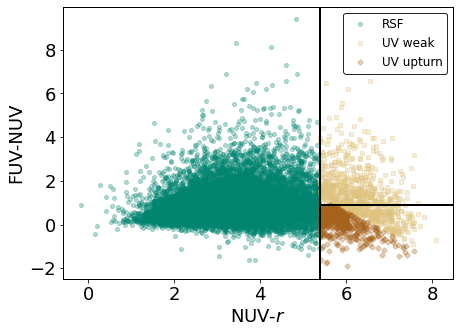

In [19]:
plt.rcParams.update(plotpars)
plot01, = plt.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=4, 
                   color = '#018571', alpha=0.3, label="RSF")
plot02, = plt.plot((nuv_band - r_band)[index_uvweak], (fuv_band - nuv_band)[index_uvweak], 's', 
                   markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")
plot03, = plt.plot((nuv_band - r_band)[index_uvup], (fuv_band - nuv_band)[index_uvup], 'D', markersize=4, 
                   color = '#a6611a', alpha=0.3, label="UV upturn")
plt.legend(loc='best')
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.659, xmax=2, color='black', linewidth=2.)
plt.xlabel(r"NUV-$r$")
plt.ylabel("FUV-NUV")
plt.savefig('../../Figs/g2_maglim_yi_diagram.pdf')
plt.savefig('../../Figs/g2_maglim_yi_diagram.png')
plt.show()

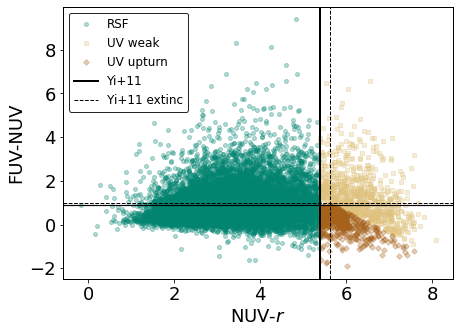

In [20]:
plt.rcParams.update(plotpars)
plot01, = plt.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=4, 
                   color = '#018571', alpha=0.3, label="RSF")
plot02, = plt.plot((nuv_band - r_band)[index_uvweak], (fuv_band - nuv_band)[index_uvweak], 's', 
                   markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")
plot03, = plt.plot((nuv_band - r_band)[index_uvup], (fuv_band - nuv_band)[index_uvup], 'D', markersize=4, 
                   color = '#a6611a', alpha=0.3, label="UV upturn")
plt.axvline(x=(5.4), color='black', linewidth=2., label='Yi+11')
plt.axvline(x=(5.4+0.235), color='black', linewidth=1., linestyle='--', label='Yi+11 extinc')
plt.axhline(y=0.9, xmin=0, xmax=2, color='black', linewidth=1.2)
plt.axhline(y=(0.9+0.0982), xmin=0, xmax=2, color='black', linewidth=1., linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"NUV-$r$")
plt.ylabel("FUV-NUV")
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.pdf')
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.png')
plt.show()

In [21]:
x1 = np.linspace(start=0., stop=6., num=50)
y1 = np.linspace(start=8.6, stop=9.1, num=50)

In [22]:
x2 = np.linspace(start=0., stop=6., num=50)
y2 = np.linspace(start=7.3, stop=6.6, num=50)

In [23]:
arrow_color = '#3182bd'

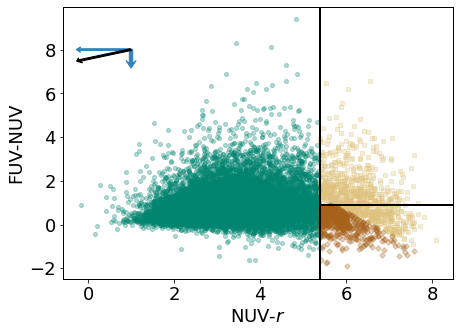

In [24]:
plt.rcParams.update(plotpars)

fig_main = plt.figure()
ax_main  = fig_main.add_subplot(1,1,1)

# ax_main.axhspan(xmin=0.015, xmax=0.195, ymin=7.1, ymax=8.3, facecolor='white', edgecolor='black', lw=1.)

ax_main.arrow(x=1., y=8, dx=-1.176, dy=0., width=0.08, color=arrow_color,alpha=1, overhang=0.4, head_length=0.1)
ax_main.arrow(x=1., y=8, dx=0.0000, dy=-0.491, width=0.08, color=arrow_color, alpha=1, overhang=0.4)
ax_main.arrow(x=1., y=8, dx=-1.176, dy=-0.491, width=0.08, color='black', alpha=1, overhang=0.4, head_length=0.1)

plot01, = ax_main.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=4, 
                       color = '#018571', alpha=0.3, label="RSF")
plot02, = ax_main.plot((nuv_band - r_band)[index_uvweak], (fuv_band - nuv_band)[index_uvweak], 's', 
                       markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")
plot03, = ax_main.plot((nuv_band - r_band)[index_uvup], (fuv_band - nuv_band)[index_uvup], 'D', markersize=4, 
                       color = '#a6611a', alpha=0.3, label="UV upturn")
ax_main.axvline(x=5.4, color='black', linewidth=2.)
ax_main.axhline(y=0.9, xmin=0.659, xmax=2, color='black', linewidth=2.)
# ax_main.plot(x1, y1, '-.', color='black', lw=1.)
# ax_main.plot(x2, y2, '-.', color='black', lw=1.)
ax_main.set_xlabel(r"NUV-$r$")
ax_main.set_ylabel("FUV-NUV")

# ax_zoom = plt.axes([0.66, .68, .23, .15])
# plot_zoom = plt.setp(ax_zoom)

# ax_zoom.arrow(x=1.1, y=0.6, dx=-1.176, dy=0., width=0.08, color=arrow_color, alpha=0.5,overhang=0.4, head_length=0.1)
# ax_zoom.arrow(x=1.1, y=0.6, dx=0.0000, dy=-0.491, width=0.08, color=arrow_color, alpha=0.5, overhang=0.4, 
#               head_length=0.1)
# ax_zoom.arrow(x=1.1, y=0.6, dx=-1.176, dy=-0.491, width=0.08, color='black', alpha=1, overhang=.4, head_length=0.1)
# ax_zoom.set_xlim([0.15, 1.2])
# ax_zoom.set_ylim([0.4, 0.75])
# ax_zoom.xaxis.set_visible(False)
# ax_zoom.yaxis.set_visible(False)


# ax_main.legend(loc='lower left')


plt.savefig('../../Figs/g2_maglim_yi_diagram_extinc.pdf')
plt.savefig('../../Figs/g2_maglim_yi_diagram_extinc.png')
plt.show()

In [25]:
limit1 = 5.4+0.235   # nuv-r
limit2 = 0.9+0.0982  # fuv-nuv
limit3 = 6.6+0.333   # fuv-r

In [26]:
idx_wk_to_rsf = np.where((fuv_band - nuv_band)[index_uvweak]>=limit2)
print(len(idx_wk_to_rsf[0]))

492


In [27]:
# %matplotlib notebook

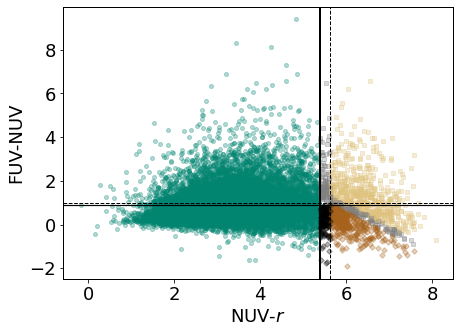

In [28]:
plt.rcParams.update(plotpars)

plot01, = plt.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=4, 
                   color = '#018571', alpha=0.3, label="RSF")
countwk=0
for i in range(nuv_band[index_uvweak].size):
    if (nuv_band - r_band)[index_uvweak][i]>=limit1 and (fuv_band-r_band)[index_uvweak][i]>=limit3:
        plot02a, = plt.plot((nuv_band - r_band)[index_uvweak][i], (fuv_band - nuv_band)[index_uvweak][i], 's', 
                           markersize=4, color = '#dfc27d', alpha=0.3)    
        
    else:
        plot02b, = plt.plot((nuv_band - r_band)[index_uvweak][i], (fuv_band - nuv_band)[index_uvweak][i], 's', 
                           markersize=4, color = 'gray', alpha=0.3)
        countwk+=1

countup=0
for i in range(nuv_band[index_uvup].size):  
    
    if (nuv_band - r_band)[index_uvup][i]>=limit1:
        plot03, = plt.plot((nuv_band - r_band)[index_uvup][i], (fuv_band - nuv_band)[index_uvup][i], 'D', 
                           markersize=4, color = '#a6611a', alpha=0.3)       
        
    else:
        plot03, = plt.plot((nuv_band - r_band)[index_uvup][i], (fuv_band - nuv_band)[index_uvup][i], 'D', 
                           markersize=4, color = 'black', alpha=0.3)
        countup+=1
        
plt.axvline(x=(5.4), color='black', linewidth=2., label='Yi+11')
plt.axvline(x=(5.4+0.235), color='black', linewidth=1., linestyle='--', label='Yi+11 extinc')
plt.axhline(y=0.9, xmin=0, xmax=2, color='black', linewidth=1.2)
plt.axhline(y=(0.9+0.0982), xmin=0, xmax=2, color='black', linewidth=1., linestyle='--')
# plt.legend(loc='best')
plt.xlabel(r"NUV-$r$")
plt.ylabel("FUV-NUV")
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.pdf')
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.png')
plt.show()

In [29]:
print(countwk, countup)

258 128


In [30]:
nuv_band[index_uvweak].size

827

In [31]:
nuv_band[index_uvup].size

444

In [32]:
print(countwk, countup)

258 128


# Characterizing the emission-lines profile of these objects

### BPT

In [33]:
xbpt_k01 = np.linspace(-2.2, 0.4, 1000)     # Kewley et al. 2001
xbpt_k03 = np.linspace(-2.2, -0.01, 1000)   # Kaufmann et al. 2003
xbpt_s06 = np.linspace(-2.2, -0.05, 1000)   # Stasinska et al. 2006
xbpt_s07 = np.linspace(-0.182, 2.0, 1000)   # Schawinski et al. 2007

In [34]:
ybpt_k01 = []
for j in range(len(xbpt_k01)):
    ybpt_k01j = 0.61 / (xbpt_k01[j] - 0.47) + 1.19  # Kewyley et al. 2001
    ybpt_k01.append(ybpt_k01j)
ybpt_k01 = np.array(ybpt_k01)

In [35]:
ybpt_k03 = []
for j in range(len(xbpt_k03)):
    ybpt_k03j = 0.61 / (xbpt_k03[j] - 0.05) + 1.3  # Kaufmann et al. 2003
    ybpt_k03.append(ybpt_k03j)
ybpt_k03 = np.array(ybpt_k03)

In [36]:
ybpt_s06 = []
for j in range(len(xbpt_s06)):
    # Stasinska et al. 2006
    ybpt_s06j = (-30.787 + (1.1358 * xbpt_s06[j]) + 0.27297) * np.tanh(5.7409 * xbpt_s06[j]) - 31.093 
    ybpt_s06.append(ybpt_s06j)
ybpt_s06 = np.array(ybpt_s06)

In [37]:
ybpt_s07 = []
for j in range(len(xbpt_s07)):
    ybpt_s07j = 1.05 * xbpt_s07[j] + 0.45    # Schawinski et al. 2007 
    ybpt_s07.append(ybpt_s07j)
ybpt_s07 = np.array(ybpt_s07)

### New indices for emission lines - cleaning the trash

In [38]:
print (np.unique(np.isnan(h_alpha_flux[index_all])))               #is there any NAN value?
print (np.unique(np.isinf(h_alpha_flux[index_all])))               #is there any infinite value?
print (h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size) #total amount of zeroes
print (h_alpha_flux[index_all].size)                               #total size of the sample
print (h_alpha_flux[index_all].size - h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size) 
#removing the zeroes

[False]
[False]
115
14331
14216


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [39]:
idx_bpt_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isnan(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(h_beta_flux[index_all]<=0))
                           *(np.logical_not(nii_flux[index_all]<=0))*(np.logical_not(oiii_flux[index_all]<=0)))

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [40]:
idx_whan_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isnan(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(nii_flux[index_all]<=0))
                          *(np.logical_not(h_alpha_ew[index_all]<=0)))

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [41]:
print (redshift[index_all][idx_bpt_clean].size)
print (redshift[index_all][idx_whan_clean].size)

11647
13050


In [42]:
print (redshift[index_all].size-redshift[index_all][idx_bpt_clean].size)

2684


In [43]:
# for i in range(h_alpha_flux[index_all][idx_bpt_clean].size):
#     print h_alpha_flux[index_all][idx_bpt_clean][i]

### Creating new arrays of clean h alpha, h beta, nii, oiii to simplify the notation

#### BPT

In [44]:
h_alpha_flux_bpt = h_alpha_flux[index_all][idx_bpt_clean]
h_beta_flux_bpt  = h_beta_flux[index_all][idx_bpt_clean]
nii_flux_bpt     = nii_flux[index_all][idx_bpt_clean]
oiii_flux_bpt    = oiii_flux[index_all][idx_bpt_clean]
uv_class_bpt     = uv_class[index_all][idx_bpt_clean]

In [45]:
print (h_alpha_flux_bpt.size)
print (uv_class_bpt.size)

11647
11647


In [46]:
print (np.unique(uv_class_bpt))

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [47]:
idx_uvup_bpt = np.where(uv_class_bpt=='UV_UPTURN')

In [48]:
idx_uvwk_bpt = np.where(uv_class_bpt=='UV_WEAK')

In [49]:
idx_rsf_bpt = np.where(uv_class_bpt=='RSF')

#### WHAN

In [50]:
h_alpha_flux_whan = h_alpha_flux[index_all][idx_whan_clean]
h_beta_flux_whan  = h_beta_flux[index_all][idx_whan_clean]
nii_flux_whan     = nii_flux[index_all][idx_whan_clean]
h_alpha_ew_whan   = h_alpha_ew[index_all][idx_whan_clean]
uv_class_whan     = uv_class[index_all][idx_whan_clean]

In [51]:
print (h_alpha_flux_whan.size)
print (uv_class_whan.size)

13050
13050


In [52]:
print (np.unique(uv_class_whan))

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [53]:
idx_uvup_whan = np.where(uv_class_whan=='UV_UPTURN')

In [54]:
idx_uvwk_whan = np.where(uv_class_whan=='UV_WEAK')

In [55]:
idx_rsf_whan = np.where(uv_class_whan=='RSF')

### All BPT settings

#### X-axis

In [56]:
xbpt = np.log10(nii_flux_bpt/h_alpha_flux_bpt)

In [57]:
xbpt_uvup = np.log10(nii_flux_bpt[idx_uvup_bpt]/h_alpha_flux_bpt[idx_uvup_bpt])
xbpt_uvwk = np.log10(nii_flux_bpt[idx_uvwk_bpt]/h_alpha_flux_bpt[idx_uvwk_bpt])
xbpt_rsf  = np.log10(nii_flux_bpt[idx_rsf_bpt]/h_alpha_flux_bpt[idx_rsf_bpt])

#### Y-axis

In [58]:
ybpt = np.log10(oiii_flux_bpt/h_beta_flux_bpt)

In [59]:
ybpt_uvup = np.log10(oiii_flux_bpt[idx_uvup_bpt]/h_beta_flux_bpt[idx_uvup_bpt])
ybpt_uvwk = np.log10(oiii_flux_bpt[idx_uvwk_bpt]/h_beta_flux_bpt[idx_uvwk_bpt])
ybpt_rsf  = np.log10(oiii_flux_bpt[idx_rsf_bpt]/h_beta_flux_bpt[idx_rsf_bpt])

### All WHAN settings

#### X-axis

In [60]:
xwhan = np.log10(nii_flux_whan/h_alpha_flux_whan)

In [61]:
xwhan_uvup = np.log10(nii_flux_whan[idx_uvup_whan]/h_alpha_flux_whan[idx_uvup_whan])
xwhan_uvwk = np.log10(nii_flux_whan[idx_uvwk_whan]/h_alpha_flux_whan[idx_uvwk_whan])
xwhan_rsf  = np.log10(nii_flux_whan[idx_rsf_whan]/h_alpha_flux_whan[idx_rsf_whan])

#### Y-axis

In [62]:
ywhan = np.log10(h_alpha_ew_whan)

In [63]:
ywhan_uvup = np.log10(h_alpha_ew_whan[idx_uvup_whan])
ywhan_uvwk = np.log10(h_alpha_ew_whan[idx_uvwk_whan])
ywhan_rsf  = np.log10(h_alpha_ew_whan[idx_rsf_whan])

In [64]:
print (xbpt_rsf.size, ybpt_rsf.size)
print (xwhan_rsf.size, ywhan_rsf.size)

11423 11423
12635 12635


In [65]:
print (xwhan.size)
print (xwhan_uvup.size+xwhan_uvwk.size+xwhan_rsf.size)

13050
13050


# Plot 02: BPT and WHAN

In [66]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [67]:
# INITIAL SETTINGS
plotpars_2cols = {'axes.linewidth': 1.,
                  'axes.labelsize': 18,
                  'xtick.labelsize': 18,
                  'ytick.labelsize': 18,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'upper right',
                  'legend.fontsize': 12,
                  'font.size':12,
                  'figure.figsize': (6, 9)
                 }

arrow_props = dict(arrowstyle='wedge',facecolor='black',connectionstyle="angle3,angleA=90,angleB=0")
text_bbox   = dict(facecolor='#f7f7f7', edgecolor='black', boxstyle='round')

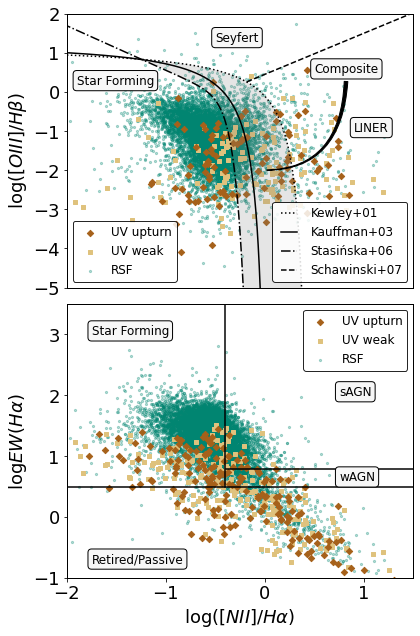

In [68]:
plt.rcParams.update(plotpars_2cols)

# FIRST PLOT -- BPT
bplot = plt.subplot(2,1,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf,   c='#018571', s=5, alpha=0.3, marker='o')
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, marker='s')
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=20, alpha=1, marker='D')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
bplot.xaxis.set_visible(False)
l1 = plt.legend([plot01a, plot01b, plot01c], [r"UV upturn", r"UV weak", r"RSF"], numpoints=1, loc='lower left', 
                frameon=True, framealpha=0.85)
l2 = plt.legend([plot02, plot03, plot04, plot05], [r"Kewley+01", r"Kauffman+03", r"Stasińska+06", r"Schawinski+07"],
          numpoints=4, loc='lower right', frameon=True, framealpha=0.85)
# l1.get_frame().set_edgecolor('black')
# l2.get_frame().set_edgecolor('black')
plt.gca().add_artist(l1)
plt.fill_betweenx(ybpt_k01, xbpt_k01, xbpt_s06, where=(xbpt_s06>-1.242)*(ybpt_s06<0.835), facecolor='gray', alpha=0.2)
plt.fill_between(xbpt_s06, ybpt_k01, ybpt_s06, where=(xbpt_s06>-1.242)*(ybpt_k01<0.835), facecolor='gray', alpha=0.2)
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $")
plt.text(-1.9, 0.2, r"Star Forming", bbox=text_bbox)
plt.text(-0.5, 1.3, r"Seyfert", bbox=text_bbox)
plt.text(0.9, -1, r"LINER", bbox=text_bbox)
plt.annotate(r"Composite", xy=(0., -2), xycoords='data', xytext=(0.5, 0.5), arrowprops=arrow_props, bbox=text_bbox)
plt.xlim([-2, 1.5])
plt.ylim([-5, 2])

# SECOND PLOT -- WHAN DIAGRAM
plt.rcParams.update(plotpars)
wplot = plt.subplot(2,1,2, sharex=bplot)
wa = plt.scatter(xwhan_rsf,  ywhan_rsf,  c='#018571', s=5,  alpha=0.3, marker='o')
wb = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1.0, marker='s')
wc = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=20, alpha=1.0, marker='D')
l3 = plt.legend([wc, wb, wa], [r"UV upturn", r"UV weak", r"RSF"], numpoints=1, loc='upper right')
# l3.get_frame().set_edgecolor('black')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=1.5)
plt.axhline(y=0.78, xmin=0.46, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$")
plt.ylabel(r"$\log EW(H{\alpha})$")
plt.text(-1.75, -0.75, r"Retired/Passive", bbox=text_bbox)
plt.text(0.75, 2.0, r"sAGN", bbox=text_bbox)
plt.text(0.75, 0.6, r"wAGN", bbox=text_bbox)
plt.text(-1.75, 3, r"Star Forming", bbox=text_bbox)
plt.xlim([-2, 1.5])
plt.ylim([-1.0, 3.5])

# FINAL SETTINGS
plt.tight_layout()
plt.savefig(os.path.join('../../Figs/', 'g2_bptwhan.pdf'))
plt.savefig(os.path.join('../../Figs/', 'g2_bptwhan.png'))
plt.show()

# Plot 03: BPT and WHAN fragmented

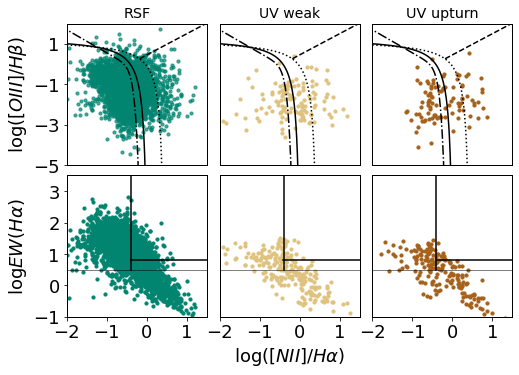

In [69]:
bpt_xlim  = [-2, 1.5]
bpt_ylim  = [-5, 2]
whan_xlim = [-2, 1.5]
whan_ylim = [-1.0, 3.5]

plt.rcParams.update(plotpars)
# BPT
## RSF
ax1=plt.subplot(2,3,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf, c='#018571', s=10, alpha=0.7, label='RSF')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $")
ax1.xaxis.set_visible(False)
plt.title("RSF")
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.yticks(np.arange(bpt_ylim[0], bpt_ylim[1], 2))


## UV Weak
ax2=plt.subplot(2,3,2)
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, label='UV weak')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.title("UV weak", fontsize=14)
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))

## UV Upturn
ax3=plt.subplot(2,3,3)
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.title("UV upturn")
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))

# WHAN 
## RSF
ax4=plt.subplot(2,3,4)
plot01c = plt.scatter(xwhan_rsf, ywhan_rsf,   c='#018571', s=10,  alpha=1, label='RSF')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.ylabel(r"$\log EW(H{\alpha})$", fontweight='bold')
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))
plt.yticks(np.arange(whan_ylim[0], whan_ylim[1], 1.))

ax5=plt.subplot(2,3,5)
plot01b = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1., label='UV weak')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$")
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax5.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))

ax6=plt.subplot(2,3,6)
plot01a = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax6.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))

plt.tight_layout(pad=-0.05)
plt.savefig('../../Figs/g2_bptwhan_split.pdf', bbox_inch='tight')
plt.savefig('../../Figs/g2_bptwhan_split.png', bbox_inch='tight')
plt.show()

## Analysing the impact of the cross-correlation between BPT, WHAN and UV classes

In [71]:
print (xbpt.size)
print (xwhan.size)

11647
13050


In [73]:
whan_class = []
for i in range(xwhan.size):
    if (xwhan[i]<-0.4)*(ywhan[i]>0.5):
        whan_class_i = 'SF'
    elif (xwhan[i]>-0.4)*(ywhan[i]>0.82):
        whan_class_i = 'sAGN'
    elif (xwhan[i]>-0.4)*(ywhan[i]<0.82)*(ywhan[i]>0.5):
        whan_class_i = 'wAGN'
    elif (ywhan[i]<0.5):
        whan_class_i = 'Retired/Passive'    
    else:
        print ('error')
    
    whan_class.append(whan_class_i)
whan_class = np.array(whan_class)

In [74]:
idx_sf   = np.where(whan_class=='SF')
idx_sagn = np.where(whan_class=='sAGN')
idx_wagn = np.where(whan_class=='wAGN')
idx_rp   = np.where(whan_class=='Retired/Passive')

##### I now have both classifications: UV and WHAN. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [75]:
print (r"RSF objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('RSF'))
print (r"UV weak objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_WEAK'))
print (r"UV upturn objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_UPTURN'))

RSF objects in SF region in WHAN diagram is 9253
UV weak objects in SF region in WHAN diagram is 78
UV upturn objects in SF region in WHAN diagram is 68


In [76]:
print (r"RSF objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('RSF'))
print (r"UV weak objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('UV_WEAK'))
print (r"UV upturn objects in sAGN region in WHAN diagram is %d" 
       % list(uv_class_whan[idx_sagn]).count('UV_UPTURN'))

RSF objects in sAGN region in WHAN diagram is 2156
UV weak objects in sAGN region in WHAN diagram is 19
UV upturn objects in sAGN region in WHAN diagram is 9


In [77]:
print (r"RSF objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('RSF'))
print (r"UV weak objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('UV_WEAK'))
print (r"UV upturn objects in wAGN region in WHAN diagram is %d" 
       % list(uv_class_whan[idx_wagn]).count('UV_UPTURN'))

RSF objects in wAGN region in WHAN diagram is 557
UV weak objects in wAGN region in WHAN diagram is 19
UV upturn objects in wAGN region in WHAN diagram is 17


In [78]:
print (r"RSF objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('RSF'))
print (r"UV weak objects in Retired/Passive region in WHAN diagram is %d" 
       % list(uv_class_whan[idx_rp]).count('UV_WEAK'))
print (r"UV upturn objects in Retired/Passive region in WHAN diagram is %d" 
       % list(uv_class_whan[idx_rp]).count('UV_UPTURN'))

RSF objects in Retired/Passive region in WHAN diagram is 669
UV weak objects in Retired/Passive region in WHAN diagram is 118
UV upturn objects in Retired/Passive region in WHAN diagram is 87


####  Printing the same information above for latex table

In [82]:
print ("UV Classification & SF & sAGN & wAGN & Retired/Passive \\")
print ("RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('RSF'), 
                                                         list(uv_class_whan[idx_sagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_wagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_rp]).count('RSF')))
print ("UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_WEAK')))
print ("UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_UPTURN')))

UV Classification & SF & sAGN & wAGN & Retired/Passive \
RSF               & 9253 & 2156   & 557   & 669 \ 
UV weak           & 78 & 19   & 19   & 118 \ 
UV upturn         & 68 & 9   & 17   & 87 \ 


#### Estimating the amount of objects in each category of the BPT diagram

In [84]:
bpt_class = []
idx_co = []
idx_sf = []
idx_sy = []
idx_ln = []

for i in range(xbpt.size):
    # checking the proximity of each observation to each curve
    idx_k01   = np.abs(xbpt_k01-xbpt[i]).argmin()  # index of the K01 curve closest to my observation i
    idx_s06   = np.abs(xbpt_s06-xbpt[i]).argmin()  # index of the S06 curve closest to my observation i
    idx_s07   = np.abs(xbpt_s07-xbpt[i]).argmin()  # index of the S07 curve closest to my observation i
       
    if (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s07[idx_s07]):
        idx_sy.append(i)
        bpt_class.append('Seyfert')
    elif (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]<ybpt_s07[idx_s07]):
        idx_ln.append(i)
        bpt_class.append('LINER')
    elif (ybpt[i]<ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s06[idx_s06]):
        idx_co.append(i)
        bpt_class.append('Composite')
    else: 
        idx_sf.append(i)
        bpt_class.append('SF')
        

bpt_class = np.array(bpt_class)
print (bpt_class.size)

11647


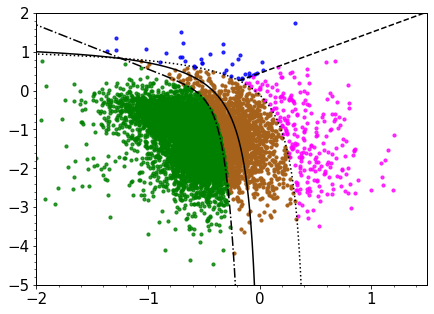

In [85]:
plot_co  = plt.scatter(xbpt[idx_co], ybpt[idx_co], c='#a6611a', s=10, alpha=1)
plot_sf  = plt.scatter(xbpt[idx_sf], ybpt[idx_sf], c='green', s=10, alpha=0.8)
plot_sy  = plt.scatter(xbpt[idx_sy], ybpt[idx_sy], c='blue', s=10, alpha=0.8)
plot_ln  = plt.scatter(xbpt[idx_ln], ybpt[idx_ln], c='magenta', s=10, alpha=0.8)
# plot_na  = plt.scatter(xbpt[idx_na], ybpt[idx_na], c='red', s=10, alpha=1)
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.grid(alpha=0.0)
plt.show()

##### I now have both classifications: UV and BPT. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [86]:
idxx_sf = np.where(bpt_class=='SF')
idxx_sy = np.where(bpt_class=='Seyfert')
idxx_ln = np.where(bpt_class=='LINER')
idxx_co = np.where(bpt_class=='Composite')

In [87]:
print ("UV Classification & SF & Seyfert & LINER & Composite \\")
print ("RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_sy]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_ln]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_co]).count('RSF')))
print ("UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_WEAK')))
print( "UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_UPTURN')))

UV Classification & SF & Seyfert & LINER & Composite \
RSF               & 9215 & 37   & 197   & 1974 \ 
UV weak           & 50 & 1   & 27   & 50 \ 
UV upturn         & 49 & 0   & 20   & 27 \ 


# Now we are evaluating the impact of UV upturn sources in redshift

In [88]:
bins = np.arange(0, (redshift[index_all]).max(), 0.05)
ratio_uvup_redseq = []
average_redshift = []
z_uv = []
z_rs = []
redshift_uvup = redshift[index_uvup]

for i in range(bins.size):
    if i==0:
        continue
    else:
        index_redseq_i = np.where((bins[i-1]<=redshift[index_redsequence])*(redshift[index_redsequence]<=bins[i]))
        index_uvup_i   = np.where((bins[i-1]<=redshift_uvup)*(redshift_uvup <= bins[i]))
        redshift_bin_redseq = redshift[index_redseq_i]
        redshift_bin_uvup   = redshift_uvup[index_uvup_i]
        if (redshift_bin_redseq.size==0):
            ratio_uvup_i = 0
            print ("There are no UV Upturn galaxies in this range of redshift: %.2f and %.2f" 
                   % (bins[i-1], bins[i]))
        else:
            ratio_uvup_i = (np.float(redshift_bin_uvup.size) / np.float(redshift_bin_redseq.size)) *100
            average_redshift_i = np.average((bins[i], bins[i-1]))
            average_redshift.append(average_redshift_i)
        z_uv.append(redshift_bin_uvup.size)
        z_rs.append(redshift_bin_redseq.size)
        ratio_uvup_redseq.append(ratio_uvup_i)
ratio_uvup_redseq = np.array(ratio_uvup_redseq)
z_uv = np.array(z_uv)
z_rs = np.array(z_rs)
average_redshift  = np.array(average_redshift)

There are no UV Upturn galaxies in this range of redshift: 0.00 and 0.05
There are no UV Upturn galaxies in this range of redshift: 0.45 and 0.50
There are no UV Upturn galaxies in this range of redshift: 0.50 and 0.55


In [ ]:
print(average_redshift)
print(z_uv)

In [ ]:
n_groups = bins.size
index = np.arange(1,n_groups,1)
fraction = {}
fraction['index'] = index
fraction['ratio'] = ratio_uvup_redseq
fraction['bins']  = bins[:-1].astype(float)
frac_df = pd.DataFrame(fraction)

In [89]:
idx_not_bpt=np.where(np.logical_not((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/
                                                                      h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isnan(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(h_alpha_flux[index_all]<=0))
                                    *(np.logical_not(h_beta_flux[index_all]<=0))
                           *(np.logical_not(nii_flux[index_all]<=0))*(np.logical_not(oiii_flux[index_all]<=0))))

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


In [90]:
print (idx_not_bpt)
print (idx_bpt_clean)
print ((uv_class[index_all][idx_not_bpt]).size)
print ((uv_class[index_all][idx_bpt_clean]).size)
print ((uv_class[index_all][idx_not_bpt]).size + (uv_class[index_all][idx_bpt_clean]).size)

(array([    3,    10,    17, ..., 14318, 14320, 14325]),)
(array([    0,     1,     2, ..., 14328, 14329, 14330]),)
2684
11647
14331


In [91]:
idx_not_whan = np.where(np.logical_not((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isnan(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(nii_flux[index_all]<=0))
                          *(np.logical_not(h_alpha_ew[index_all]<=0))))

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [92]:
print np.array(idx_not_whan).size
print np.unique(uv_class[index_all][idx_not_whan])
print (uv_class[index_all][idx_not_whan]).size + (uv_class[index_all][idx_whan_clean]).size

SyntaxError: invalid syntax (<ipython-input-92-8025099391bf>, line 1)

In [138]:
print (list(uv_class[index_all][idx_not_bpt]).count('UV_UPTURN'))
print (list(uv_class[index_all][idx_not_bpt]).count('UV_WEAK'))
print (list(uv_class[index_all][idx_not_bpt]).count('RSF'))

114
168
2402


In [139]:
print (list(uv_class[index_all][idx_not_whan]).count('UV_UPTURN'))
print (list(uv_class[index_all][idx_not_whan]).count('UV_WEAK'))
print (list(uv_class[index_all][idx_not_whan]).count('RSF'))

29
62
1190


In [140]:
print (uv_class[index_all][idx_not_whan].size)
print (uv_class[index_all][idx_whan_clean].size)

1281
13050


In [93]:
emlines_not_bpt = []
for i in range(np.array(idx_not_bpt).size):
    emlines_not_bpt.append('NA')
emlines_not_bpt = np.array(emlines_not_bpt)

In [94]:
emlines_not_whan = []
for i in range(np.array(idx_not_whan).size):
    emlines_not_whan.append('NA')
emlines_not_whan = np.array(emlines_not_whan)

In [137]:
idxs_bpt_temp = idx_bpt_clean + idx_not_bpt
idxs_bpt = list(idxs_bpt_temp[0])+list(idxs_bpt_temp[1])
print (len(idxs_bpt))

14331


### Now we are going to add these information into the whole dataset, in case we need it in the future

In [96]:
bpt_catai_temp1 = pd.DataFrame(cataid[index_all][idx_bpt_clean])
bpt_class_temp1 = pd.DataFrame(bpt_class)
bpt_pos = pd.concat([bpt_catai_temp1, bpt_class_temp1], axis=1)
bpt_pos.columns = ['CATAID', 'BPT_CLASS']

bpt_catai_temp2 = pd.DataFrame(cataid[index_all][idx_not_bpt])
bpt_class_temp2 = pd.DataFrame(emlines_not_bpt)
bpt_neg = pd.concat([bpt_catai_temp2, bpt_class_temp2], axis=1)
bpt_neg.columns = ['CATAID', 'BPT_CLASS']

bpt_all = pd.concat([bpt_pos, bpt_neg])

In [136]:
print (np.unique(bpt_all['CATAID']).size)

14331


In [98]:
whan_catai_temp1 = pd.DataFrame(cataid[index_all][idx_whan_clean])
whan_class_temp1 = pd.DataFrame(whan_class)
whan_pos = pd.concat([whan_catai_temp1, whan_class_temp1], axis=1)
whan_pos.columns = ['CATAID', 'WHAN_CLASS']

whan_catai_temp2 = pd.DataFrame(cataid[index_all][idx_not_whan])
whan_class_temp2 = pd.DataFrame(emlines_not_whan)
whan_neg = pd.concat([whan_catai_temp2, whan_class_temp2], axis=1)
whan_neg.columns = ['CATAID', 'WHAN_CLASS']

whan_all = pd.concat([whan_pos, whan_neg])

In [135]:
print (np.unique(whan_all['CATAID']).size)

14331


In [100]:
my_df_temp = pd.DataFrame(my_data[index_all+1])
my_df_temp.columns = my_data[0,:]

In [101]:
my_df_temp2 = my_df_temp.set_index('CATAID').join(bpt_all.set_index('CATAID')).join(whan_all.set_index('CATAID'))

In [102]:
my_df_temp2['BPT_CLASS'].value_counts(dropna=False)

SF           9314
NA           2684
Composite    2051
LINER         244
Seyfert        38
Name: BPT_CLASS, dtype: int64

In [103]:
my_df_temp2['WHAN_CLASS'].value_counts(dropna=False)

SF                 9399
sAGN               2184
NA                 1281
Retired/Passive     874
wAGN                593
Name: WHAN_CLASS, dtype: int64

In [104]:
my_df_temp2.to_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv', index=True)

In [105]:
my_df_na_uvup = my_df_temp2[my_df_temp2['WHAN_CLASS']=='NA']
my_df_na_uvup = my_df_na_uvup.loc[my_df_na_uvup['UV_CLASS_YI2011']=='UV_UPTURN']

my_df_rp_uvup = my_df_temp2[my_df_temp2['WHAN_CLASS']=='Retired/Passive']
my_df_rp_uvup = my_df_rp_uvup.loc[my_df_rp_uvup['UV_CLASS_YI2011']=='UV_UPTURN']

In [106]:
x_na_uvup, y_na_uvup = np.unique(my_df_na_uvup['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), return_counts=True)
x_rp_uvup, y_rp_uvup = np.unique(my_df_rp_uvup['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), return_counts=True)

na_all_uvup = np.sum(y_na_uvup)
rp_all_uvup = np.sum(y_rp_uvup)

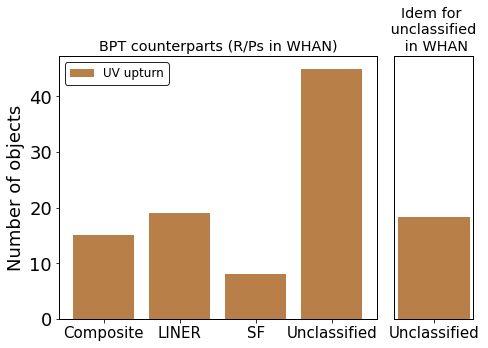

In [107]:
text_bbox_wk = dict(facecolor='#f0f0f0', edgecolor='black', boxstyle='round')
text_bbox_up = dict(facecolor='#d9d9d9', edgecolor='black', boxstyle='round')

fig = plt.figure()

plt.rcParams.update(plotpars)
plt.rcParams['xtick.labelsize'] = 15

grid = GridSpec(1,2, width_ratios=[4.,1.])
fig_rp = fig.add_subplot(grid[0,0])
fig_na = fig.add_subplot(grid[0,1])

fig_rp.bar(x=x_rp_uvup, height=y_rp_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_rp.set_ylabel("Number of objects")
fig_rp.legend(loc='best')
fig_rp.set_title("BPT counterparts (R/Ps in WHAN)")

fig_na.bar(x=x_na_uvup, height=y_na_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_na.set_ylim([0,75])
fig_na.yaxis.set_visible(False)
fig_na.set_title('Idem for \n unclassified \n in WHAN')

plt.tight_layout(w_pad=0.)
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsI.png', bbox='tight')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsI.pdf', bbox='tight')
plt.show()

In [108]:
my_df_na_uvwk = my_df_temp2[my_df_temp2['WHAN_CLASS']=='NA']
my_df_na_uvwk = my_df_na_uvwk.loc[my_df_na_uvwk['UV_CLASS_YI2011']=='UV_WEAK']

my_df_rp_uvwk = my_df_temp2[my_df_temp2['WHAN_CLASS']=='Retired/Passive']
my_df_rp_uvwk = my_df_rp_uvwk.loc[my_df_rp_uvwk['UV_CLASS_YI2011']=='UV_WEAK']

In [109]:
x_na_uvwk, y_na_uvwk = np.unique(my_df_na_uvwk['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), 
                                 return_counts=True)
x_rp_uvwk, y_rp_uvwk = np.unique(my_df_rp_uvwk['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), 
                                 return_counts=True)
na_all_uvwk = np.sum(y_na_uvwk)
rp_all_uvwk = np.sum(y_rp_uvwk)

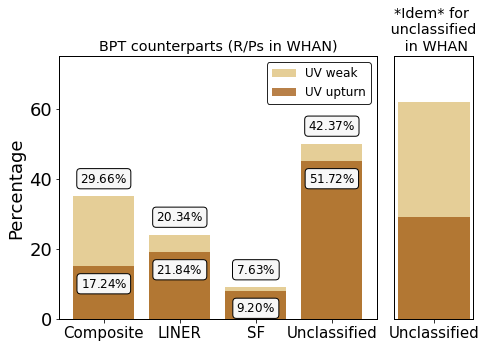

In [110]:
text_bbox_wk = dict(facecolor='#f0f0f0', edgecolor='black', boxstyle='round')
text_bbox_up = dict(facecolor='#d9d9d9', edgecolor='black', boxstyle='round')

fig = plt.figure()

plt.rcParams.update(plotpars)
plt.rcParams['xtick.labelsize'] = 15

grid = GridSpec(1,2, width_ratios=[4.,1.])
fig_rp = fig.add_subplot(grid[0,0])
fig_na = fig.add_subplot(grid[0,1])

fig_rp.bar(x=x_rp_uvwk, height=y_rp_uvwk, color='#dfc27d', alpha=0.8, label="UV weak")
fig_rp.bar(x=x_rp_uvup, height=y_rp_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
for i in range(x_rp_uvup.size):
    frac01 = (y_rp_uvup[i]/rp_all_uvup)*100
    fig_rp.text(x=x_rp_uvup[i], y=y_rp_uvup[i]-5, s='$%.2f\%%$' % (frac01), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
    frac02 = (y_rp_uvwk[i]/rp_all_uvwk)*100
    fig_rp.text(x=x_rp_uvwk[i], y=y_rp_uvwk[i]+5, s='$%.2f\%%$' % (frac02), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
fig_rp.set_ylim([0,75])
fig_rp.set_ylabel("Percentage")
fig_rp.legend(loc='best')
fig_rp.set_title("BPT counterparts (R/Ps in WHAN)")

fig_na.bar(x=x_na_uvwk, height=y_na_uvwk, color='#dfc27d', alpha=0.8, label="UV weak")
fig_na.bar(x=x_na_uvup, height=y_na_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_na.set_ylim([0,75])
fig_na.yaxis.set_visible(False)
fig_na.set_title('*Idem* for \n unclassified \n in WHAN')

plt.tight_layout(w_pad=0.)
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII.png', bbox='tight')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII.pdf', bbox='tight')
plt.show()

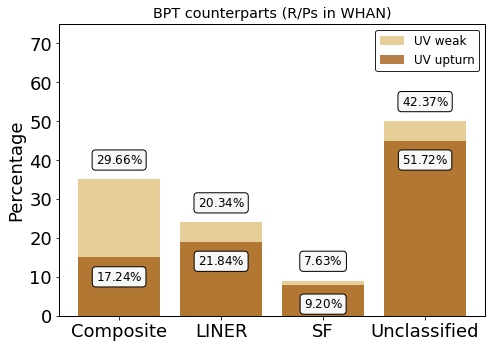

In [111]:
text_bbox_wk = dict(facecolor='#f0f0f0', edgecolor='black', boxstyle='round')
text_bbox_up = dict(facecolor='#d9d9d9', edgecolor='black', boxstyle='round')

plt.rcParams.update(plotpars)

plt.bar(x=x_rp_uvwk, height=y_rp_uvwk, color='#dfc27d', alpha=0.8, label="UV weak")
plt.bar(x=x_rp_uvup, height=y_rp_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
for i in range(x_rp_uvup.size):
    frac01 = (y_rp_uvup[i]/rp_all_uvup)*100
    plt.text(x=x_rp_uvup[i], y=y_rp_uvup[i]-5, s='$%.2f\%%$' % (frac01), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
    frac02 = (y_rp_uvwk[i]/rp_all_uvwk)*100
    plt.text(x=x_rp_uvwk[i], y=y_rp_uvwk[i]+5, s='$%.2f\%%$' % (frac02), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
plt.ylim([0,75])
plt.ylabel("Percentage")
plt.legend(loc='best')
plt.title("BPT counterparts (R/Ps in WHAN)")

plt.tight_layout()
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII_simple.png', bbox='tight')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII_simple.pdf', bbox='tight')
plt.show()

In [112]:
my_df_uvwk = pd.concat([my_df_rp_uvwk, my_df_na_uvwk])
my_df_uvup = pd.concat([my_df_rp_uvup, my_df_na_uvup])
my_df_pie  = pd.concat([my_df_uvwk, my_df_uvup])
uv_unique  = np.unique(my_df_pie['UV_CLASS_YI2011'].values, return_counts=True)
bpt_unique = np.unique(my_df_pie['BPT_CLASS'].values, return_counts=True)

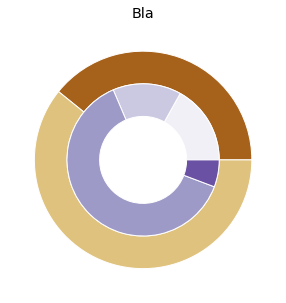

In [113]:
size=0.3

outer_colors = ['#a6611a', '#dfc27d']
inner_colors = ['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3']

fig, ax = plt.subplots()
plt.rcParams.update(plotpars)

ax.pie(x=uv_unique[1], radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'),)
ax.pie(x=bpt_unique[1], radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal", title='Bla')
plt.show()

In [114]:
# for i in my_df_temp2.keys():
#     print i

In [115]:
np.unique(my_df_temp2['TYPE'].values, return_counts=True)

(array(['3'], dtype=object), array([14331]))

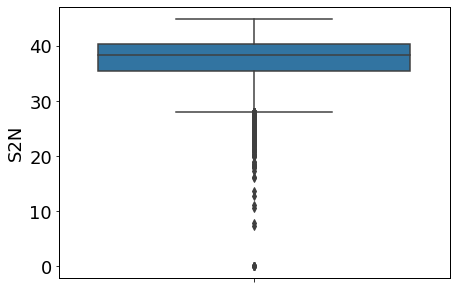

In [116]:
sns.boxplot(y=my_df_temp2['S2N'].astype(float))
plt.show()

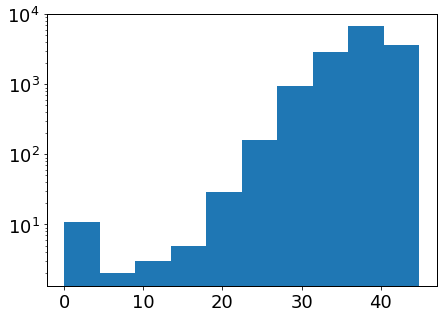

In [117]:
plt.hist(my_df_temp2['S2N'].values.astype(float))
plt.yscale('log')
plt.show()

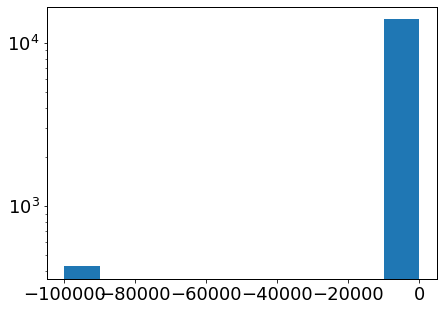

In [118]:
plt.hist(my_df_temp2['SN'].values.astype(float))
plt.yscale('log')
plt.show()

In [119]:
my_df_temp2['SN'].describe()

count        14331
unique       13885
top       -99999.0
freq           427
Name: SN, dtype: object

In [120]:
my_df_rp_uvup['SN'].describe()

count           87
unique          87
top       6.977677
freq             1
Name: SN, dtype: object

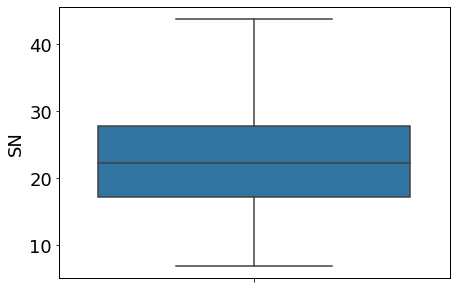

In [121]:
sns.boxplot(y=my_df_rp_uvup['SN'].astype(float))
plt.show()

In [122]:
my_df_rp_uvup['SN'].min()

'10.86113'

In [123]:
my_df_na_uvup['SN'].min()

'11.37916'

In [124]:
my_df_rp_uvwk['SN'].min()

'10.75864'

In [125]:
my_df_na_uvwk['SN'].describe()

count           62
unique          61
top       -99999.0
freq             2
Name: SN, dtype: object

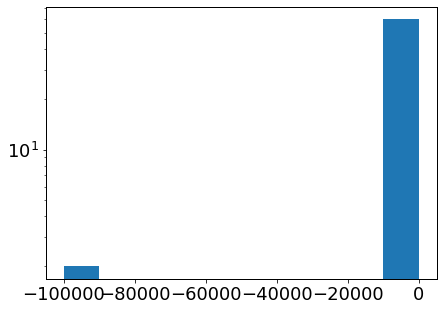

In [126]:
plt.hist(my_df_na_uvwk['SN'].astype(float), bins=10)
plt.yscale('log')
plt.show()

In [127]:
np.unique((my_df_na_uvwk['SN'].astype(float)<0), return_counts=True)

(array([False,  True]), array([60,  2]))

In [128]:
idx_clean_na = np.where(my_df_na_uvwk['SN'].values.astype(float)>0)

In [129]:
my_df_na_uvwk['SN'].iloc[idx_clean_na]

CATAID
621993     4.912123
23235      26.75382
249583     10.32274
249676     14.46896
250400      14.3507
265774     33.28814
266440     15.35118
267194     11.23645
273306     10.79617
289494     22.70406
289570     24.36652
319998     15.50151
320155     30.70788
362473     7.901948
3583522    19.27715
3604946    22.72226
3610432    25.46889
3611069    8.020835
659898     26.31616
3630943    44.66188
486350     10.36101
504997     31.80299
505829     16.17212
506120     16.81315
3889601     14.7341
3901077     53.0176
3901985    31.35719
3903919     27.4515
30756      29.96743
32199      28.28571
39715      26.87544
63733      19.72633
83945       18.0377
99658       20.3229
106144     26.32641
535005     30.37516
535457     11.75932
543437     21.73599
548831     19.96347
548954     23.75913
549421     20.98372
567891     13.88147
118791     9.600109
138552     14.44849
143950     25.46126
171308     29.40964
184126     26.59009
185015     25.21339
185837     17.43519
185960     27

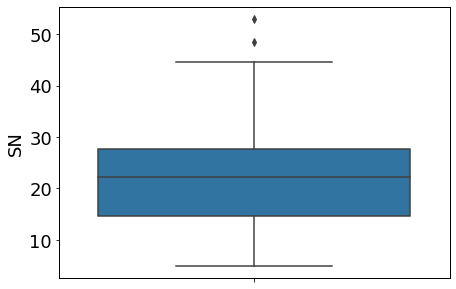

In [130]:
sns.boxplot(y=my_df_na_uvwk['SN'].iloc[idx_clean_na].astype(float))
plt.show()

In [131]:
my_df_na_uvwk['SN'].iloc[idx_clean_na].describe(percentiles=[0.25, 0.5, 0.75])

count           60
unique          60
top       29.96743
freq             1
Name: SN, dtype: object

In [132]:
my_df_na_uvwk['SN'].iloc[idx_clean_na]

CATAID
621993     4.912123
23235      26.75382
249583     10.32274
249676     14.46896
250400      14.3507
265774     33.28814
266440     15.35118
267194     11.23645
273306     10.79617
289494     22.70406
289570     24.36652
319998     15.50151
320155     30.70788
362473     7.901948
3583522    19.27715
3604946    22.72226
3610432    25.46889
3611069    8.020835
659898     26.31616
3630943    44.66188
486350     10.36101
504997     31.80299
505829     16.17212
506120     16.81315
3889601     14.7341
3901077     53.0176
3901985    31.35719
3903919     27.4515
30756      29.96743
32199      28.28571
39715      26.87544
63733      19.72633
83945       18.0377
99658       20.3229
106144     26.32641
535005     30.37516
535457     11.75932
543437     21.73599
548831     19.96347
548954     23.75913
549421     20.98372
567891     13.88147
118791     9.600109
138552     14.44849
143950     25.46126
171308     29.40964
184126     26.59009
185015     25.21339
185837     17.43519
185960     27

# Stellar mass distribution

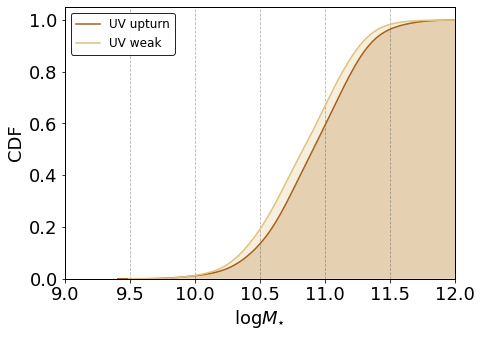

In [133]:
plt.rcParams.update(plotpars)
sns.kdeplot(stellar_mass[index_uvup], shade=True, color='#a6611a', cumulative=True, label='UV upturn')
sns.kdeplot(stellar_mass[index_uvweak], shade=True, color='#dfc27d', cumulative=True, label='UV weak')
plt.xlim([9,12])
plt.legend(loc='best')
plt.grid(axis='x', which='major', alpha=0.3, linestyle='dashed', color='black')
plt.ylabel(r"CDF")
plt.xlabel(r"$\log M_{\star}$")
plt.savefig('../../LargeFilesResults/PaperFigs/g2_stellarmass_distribution_cum.pdf')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_stellarmass_distribution_cum.png')
plt.show()

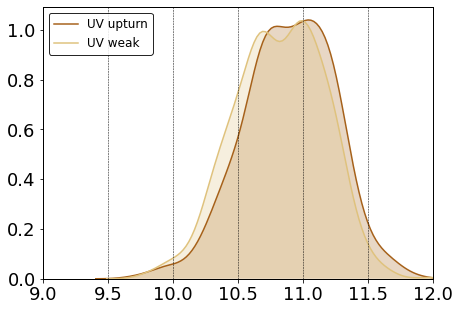

In [134]:
plt.rcParams.update(plotpars)
sns.kdeplot(stellar_mass[index_uvup], shade=True, color='#a6611a', label='UV upturn')
sns.kdeplot(stellar_mass[index_uvweak], shade=True, color='#dfc27d', label='UV weak')
plt.xlim([9,12])
plt.legend(loc='best')
plt.axvline(x=9.5, color='black', linewidth=0.5, ls='--')
plt.axvline(x=10, color='black', linewidth=.5, ls='--')
plt.axvline(x=10.5, color='black', linewidth=.5, ls='--')
plt.axvline(x=11, color='black', linewidth=.5, ls='--')
plt.axvline(x=11.5, color='black', linewidth=.5, ls='--')
plt.savefig('../../LargeFilesResults/g2_stellarmass_distribution.pdf')
plt.savefig('../../LargeFilesResults/g2_stellarmass_distribution.png')
plt.show()